In [7]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from tensorflow.keras.models import load_model

In [8]:
IMAGE_WIDTH=100
IMAGE_HEIGHT=50
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3 # color or gray
batch_size= 20

In [9]:
# IMAGE_WIDTH=80
# IMAGE_HEIGHT=24
# IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
# IMAGE_CHANNELS = 3 # color or gray
# # batch_size= 10

In [11]:
categories=[]
train_dir=os.listdir("eyes_test_real/eyes_test_real_train")
for filename in train_dir:
    category=filename.split(' ')[0]
    if category == 'bonghwang':
        categories.append('bonghwang')
    if category == 'dohwa':
        categories.append('dohwa')
    if category == 'gongjak':
        categories.append('gongjak')
    if category == 'horang':
        categories.append('horang')
    if category == 'so':
        categories.append('so')
    if category == 'yong':
        categories.append('yong')

In [12]:
df=pd.DataFrame({'filename':train_dir,'category':categories})
df

,filename,category
0,bonghwang (1).jpg,bonghwang
1,bonghwang (10).jpg,bonghwang
2,bonghwang (100).jpg,bonghwang
3,bonghwang (1000).jpg,bonghwang
4,bonghwang (1001).jpg,bonghwang
...,...,...
20223,horang (995).jpg,horang
20224,horang (996).jpg,horang
20225,horang (997).jpg,horang
20226,horang (998).jpg,horang


In [13]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=777)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [14]:
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

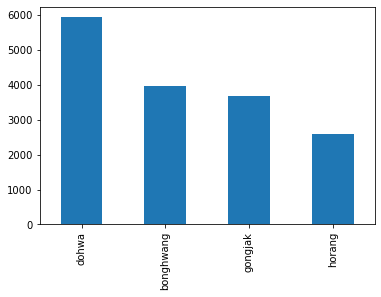

In [15]:
train_df['category'].value_counts().plot.bar()

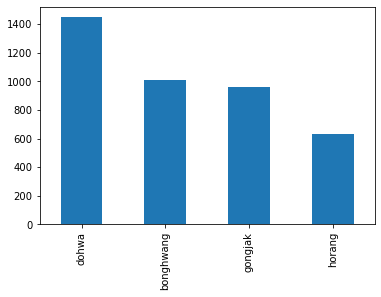

In [16]:
validate_df['category'].value_counts().plot.bar()

In [17]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]


In [18]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
train_generator=train_datagen.flow_from_dataframe(train_df,
                                 'eyes_test_real/eyes_test_real_train',
                                 x_col='filename',
                                 y_col='category',
                                  target_size=IMAGE_SIZE,
                                  class_mode='categorical',
                                  batch_size=batch_size
                                 )

Found 16182 validated image filenames belonging to 4 classes.


In [20]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(validate_df,
                                                              "eyes_test_real/eyes_test_real_train",
                                                              x_col='filename',
                                                              y_col='category',
                                                              target_size=IMAGE_SIZE,
                                                              class_mode='categorical',
                                                              batch_size=batch_size)

Found 4046 validated image filenames belonging to 4 classes.


In [21]:
from keras.models import Sequential
from keras.layers import *

In [22]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax')) 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 48, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 98, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 22, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 47, 22, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 11, 64)        0

In [23]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [24]:
earlystop = EarlyStopping(patience=5),
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                           patience=2,
                                           verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [25]:
history = model.fit_generator(train_generator,
                              epochs=40,
                              validation_data=validation_generator,
                              validation_steps=total_validate//batch_size,
                              steps_per_epoch=total_train//batch_size,
                              callbacks=[earlystop,learning_rate_reduction])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
809/809 [==============================] - 93s 115ms/step - loss: 0.7951 - acc: 0.7075 - val_loss: 0.6706 - val_acc: 0.7817
Epoch 2/40
809/809 [==============================] - 91s 113ms/step - loss: 0.3870 - acc: 0.8556 - val_loss: 0.3090 - val_acc: 0.8948
Epoch 3/40
809/809 [==============================] - 91s 113ms/step - loss: 0.2435 - acc: 0.9103 - val_loss: 0.2207 - val_acc: 0.9149
Epoch 4/40
809/809 [==============================] - 92s 113ms/step - loss: 0.2095 - acc: 0.9243 - val_loss: 0.2371 - val_acc: 0.9134
Epoch 5/40
809/809 [==============================] - 92s 113ms/step - loss: 0.1573 - acc: 0.9445 - val_loss: 0.1426 - val_acc: 0.9455
Epoch 6/40
809/809 [==============================] - 92s 113ms/step - loss: 0.1605 - acc: 0.9421 - val_loss: 0.4469 - val_acc: 0.8626
Epoch 7/40
809/809 [==============================] - 92s 113ms/step - loss: 0.1186 - acc: 0.9581 - val_loss: 0.10

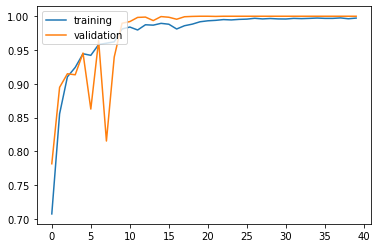

In [26]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [27]:
model.evaluate(train_generator)

810/810 [==============================] - 18s 22ms/step - loss: 1.7121e-05 - acc: 1.0000


[1.7121428754762746e-05, 1.0]

In [28]:
model.save("model_eyes_test_real(2).h5")

In [50]:
loaded_model = load_model('model_eyes_test_real(2).h5')

### pretrained model을 통한 예측

In [81]:
categories=[]
train_dir=os.listdir("eyes_test_real\eyes_test_real_test")
for filename in train_dir:
    category=filename.split(' ')[0]
    if category == 'bonghwang':
        categories.append('bonghwang')
    if category == 'dohwa':
        categories.append('dohwa')
    if category == 'gongjak':
        categories.append('gongjak')
    if category == 'horang':
        categories.append('horang')
    if category == 'so':
        categories.append('so')
    if category == 'yong':
        categories.append('yong')

In [82]:
categories

['dohwa', 'dohwa', 'dohwa', 'dohwa', 'dohwa', 'dohwa', 'dohwa']

In [83]:
df=pd.DataFrame({'filename':train_dir,'category':categories})
df

,filename,category
0,dohwa (1).jpg,dohwa
1,dohwa (2).jpg,dohwa
2,dohwa (3).jpg,dohwa
3,dohwa (4).jpg,dohwa
4,dohwa (5).jpg,dohwa
5,dohwa (6).jpg,dohwa
6,dohwa (7).jpg,dohwa


In [84]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(df,
                                 'eyes_test_real/eyes_test_real_test/',
                                 x_col='filename',
                                 y_col='category',
                                  target_size=IMAGE_SIZE,
                                  class_mode='categorical',
                                  batch_size=batch_size)

Found 7 validated image filenames belonging to 1 classes.


In [85]:
output = loaded_model.predict_generator(validation_generator,steps = 1)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(validation_generator.class_indices)
print(output)

{'dohwa': 0}
[[0.001 0.999 0.000 0.000]
 [0.000 1.000 0.000 0.000]
 [0.990 0.010 0.000 0.000]
 [0.000 0.346 0.654 0.000]
 [0.002 0.996 0.002 0.000]
 [0.005 0.995 0.000 0.000]
 [0.000 0.985 0.015 0.000]]


In [86]:
test=[]
print(len(output))
for i in output:
    test.append(i.argmax())

7


In [87]:
test

[1, 1, 0, 2, 1, 1, 1]

In [88]:
dap = [0,0,0,0,0,0,0,0,0,0,0,0,0]

In [89]:
acc = []
for i in range(len(test)):
    if test[i] == dap[i]:
        acc.append(1)
    else:
        acc.append(0)

In [90]:
acc

[0, 0, 1, 0, 0, 0, 0]

In [91]:
np.average(acc)

0.14285714285714285